<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="250" height="250"><br>
</center>


 - (https://bit.ly/hg-08-1)
 - (https://bit.ly/hg-08-2)
 - (https://bit.ly/hg-08-3)
 
 
# Chapter08. 이미지를 위한 인공 신경망 (패션 럭키백의 정확도를 높인다!)

- 학습목표
    - 이미지 분류 문제에 뛰어난 성능을 발휘하는 합성곱 신경망의 개념과 구성 요소에 대해 배운다.
    - 케라스 API로 합성곱 신경망을 만들어 패션 MNIST 데이터에서 성능을 평가해 본다.
    - 합성곱 총의 필터와 활성화 출력을 시각화하여 합성곱 싱경망이 학습한 내용을 고찰해 본다.
    
    
## 08-1 합성곱 신경망의 구성 요소

- 핵심키워드
    - 합성곱
    - 필터
    - 특성 맵
    - 패딩
    - 스트라이드
    - 풀링
    - 합성곱 신경망을 구성하는 기본 개념과 동작 원리를 배우고 간단한 합성곱, 풀링 계산 방법을 익힌다.
    
### 합성곱

**합성곱 convolution** 은 마치 입력 데이터에 마법의 도장을 찍어서 유용한 특성만 드러나게 하는 것으로 비유할 수 있다. 그럼 여기서 합성곱의 동작 원리를 자세히 알아보자.

7장에서 사용한 밀집층에는 뉴런마다 입력 개수만큼의 가중치가 있다. 즉 모든 입력에 가중치를 곱한다. 이과정을 그림으로 표현하면 다음과 같다.

인공 신경망은 처음에 가중치 w1 ~ w10과 절편 b를 랜덤하게 초기화한 다음 에포크를 반복하면서 경사 하강법 알고리즘을 사용하여 손실이 낮아지도록 최적의 가중치와 절편을 찾아간다. 이것이 바로 모델 훈련이다.

예를 들어 밀집층에 뉴런이 3개 있다면 출력은 3개가 된다. 입력 개수에 상관없이 동일하다. 7장의 예를 다시 떠올려 보면 패션 MNIST 이미지에 있는 784개의 픽셀을 입력받는 은닉층의 뉴런 개수가 100개면 뉴런마다 하나씩 출력도 100개가 된다.

합성곱은 밀집층의 계산과 조금 다르다. 입력 데이터 전체에 가중치를 적용하는 것이 아니라 일부에 가중치를 곱한다. 다음 그림과 이전의 밀집층 그림을 비교해 보자. 여기에서는 이 뉴런이 3개의 가중치를 가진다고 가정했다.

가중치 w1~w3 이 입력의 처음 3개 특성과 곱해져 1개의 출력을 만든다. 그다음이 중요하다. 이 뉴런이 한 칸 아래로 이동해 두 번째부터 네 번째 특성과 곱해져 새로운 출력을 만든다. 

여기에서 중요한 것은 첫 번째 합성곱에 사용된 가중치 w1 ~ w3과 절편 b가 두 번째 합성곱에도 동일하게 사용된다. 이렇게 한 칸씩 아래로 이동하면서 출력을 만드는 것이 합성곱이다. 여기에서는 이 뉴런의 가중치가 3개이기 때문에 모두 8개의 출력이 만들어진다.

쉽게 구분할 수 있도록 8번의 계산을 다른 색으로 나타냈지만 모두 같은 뉴런이다. 즉 모두 같은 가중치 w1 ~ w3과 절편 b흫 사용한다.

밀집층의 뉴런의 입력 개수만큼 10개의 가중치를 가지고 1개의 출력을 만든다. 합성곱 츠으이 뉴런은 3개의 가중치를 가지고 8개의 출력을 만든다. 혹시 눈치챘을지 모르지만 합성곱 층의 뉴런에 있는 가중치 개수는 정하기 나름이다. 즉 또 다른 하이퍼파라미터다. 이는 마치 입력 데이터 위를 이동하면서 같은 도장(!)으로 하나씩 찍는 것처럼 생각할 수 있다. 도장을 찍을 때마다 출력이 하나씩 만들어지는 거다.

이전에 그렸던 신경망 층의 그림은 뉴런이 길게 늘어서 있고 서로 조밀하게 연결되어 있다. 그런데 합성곱에서는 뉴런이 입력 위를 이동하면서 출력을 만들기 때문에 이런 식으로 표현하기가 어렵다. 또 뉴런이라고 부르기도 어색하다. **합성곱 신경망 convolutional neural network,CNN**에서는 완전 연결 신경망과 달리 뉴런을 **필터 filter**라고 부른다. 혹은 **커널 kernel**이라고도 부른다.

- 뉴런 = 필터 = 커널 모두 같은말이라고 생각하면 좋다.

- 완전 연결 신경망이 무엇인가?
    - 7장에서 만들었던 신경망이다. 완전 연결층(밀집층)만 사용하여 만든 신경망을 완전 연결 신경망(밀집 신경망)이라고 부른다.
    

이 책에서는 케라스 API와 이름을 맞추어 뉴런 개수를 이야기할 때는 필터라 부르고, 입력에 곱해지는 가중치를 의미할 때는 커널이라고 부른다. 합성곱의 장점은 1차원이 아니라 2차원 입력에도 적용할 수 있다는 것이다.

입력이 2차원 배열이면 필터(도장!)도 2차원이어야 한다. 이 그림에서 이 필터의 커널 크기는(3,3)으로 가정한다.(앞에서도 언급했지만 커널 크기는 우리가 지정해야 할 하이퍼파라미터이다.) 그다음 왼쪽 위 모서리에서부터 합성곱을 시작한다. 입력의 9개 원소와 커널의 9개 가중치를 곱한 후(물론 여기에서도 절편을 더한다.) 1개의 출력을 만든다.

그다음에는 필터가 오른쪽으로 한 칸 이동하여 합성곱을 또 수행한다. 입력의 너비가 4이므로 더이상 오른쪽으로 한 칸 이동할 수 없다. 이럴 때는 아래로 한 칸 이동한 다음 다시 왼쪽에서부터 합성곱을 수행한다. 그리고 다시 오른쪽으로 한 칸 이동한다. 

합성곱은 마치 도장을 찍듯이 왼쪽 위에서 오른쪽 맨 아래까지 이동하면서 출력을 만든다. 계산식은 밀집층과 크게 다르지 않다. 입력과 가중치의 행과 열을 맞추어 곱셈하고 모두 더하는게 전부이다. 

이때 4개의 출력을 필터강 ㅣㅂ력에 놓인 위치에 맞게 2차원으로 배치한다. 즉 왼쪽 위, 오른쪽 위, 왼쪽 아래, 오른쪽 아래 모두 4개의 위치에 해당 값을 놓는다. 이렇게 출력을 2차원으로 표현하면 (4,4)크기의 입력을 (2,2)크기로 압축한 느낌이 난다. 합성곱 계산을 통해 얻은 출력을 특별히 **특성 맵 feature map** 이라고 부른다.

- 필터, 커널, 특성 맵 같은 새로운 용어를 모두 알아야 하나?
    - 그렇다. 공통으로 사용하는 언어이다. 이미 이 분야의 많은 개발자나 학자가 사용하는 용어인 만큼 익숙해져야 다른 사람과 원활하게 의견을 나눌 수 있고 다른 책을 볼 때도 쉽게 이해할 수 있다.
    
밀집층에서 여러 개의 뉴런을 사용하듯이 합성곱 층에서도 여러 개의 필터를 사용한다. 하나만 사용할 이유는 없다. 다음 그림에서처럼 여러 개의 필터를 사용하면 만들어진 특성 맵은 순서대로 차곡 차곡 쌓인다.(2,2) 크기의 특성 맵을 쌓으면 3차원 배열이 된다. 다음 그림에서는 3개의 필터를 사용했기 때문에 (2,2,3) 크기의 3차원 배열이 된다.

밀집층에 있는 뉴런의 가중치가 모두 다르듯이 합성곱 층에 있는 필터의 가중치(터널)도 모두 다르다. 너무 당연하지만 같은 가중치를 가진 필터를 여러 개 사용할 이유가 없다.

실제 계산은 밀집층과 동일하게 단순히 입력과 가중치를 곱하는 것이지만 2차원 형태를 유지하는 점이 다르다. 또 입력보다 훨씬 작은 크기의 커널을 사용하고 입력 위를(왼쪽에서 오른쪽으로, 위에서 아래로) 이동하면서 2차원 특성 맵을 만든다. 이렇게 2차원 구조를 그대로 사용하기 때문에 합성곱 신경망이 이미지 처리 분야에서 뛰어난 성능을 발휘한다. 그럼 케라스에서 합성곱 층을 어떻게 만드는지 보자.

### 케라스 합성곱 층

케라스의 층은 모두 keras.layer 패키지 아래 클래스로 구현되어 있다. 합성곱 층도 마찬가지이다. 특별히 입력 위를(왼쪽에서 오른쪽으로, 위에서 아래로) 이동하는 합성곱은 Conv2D 클래스로 제공한다.

In [7]:
from tensorflow import keras

keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Conv2D 클래스의 첫 번째 매개변수는 필터(즉 도장!)의 개수이다. kernel_size 매개변수는 필터에 사용할 커널의 크기를 지정한다. 필터의 개수와 커널의 크기는 반드시 지정해야 하는 매개변수이다. 마지막으로 밀집층에서처럼 활성화 함수를 지정한다. 여기에서는 렐루 함수를 선택했다.

- 특성 맵은 활성화 함수를 적용하기 전인가? 후 인가?
    - 결론부터 이야기 하자면 후자이다. 완전 연결 신경망에서처럼 합성곱 신경망에서도 종종 활성화 함수를 언급하지 않는다. 일반적으로 특성 맵은 활성화 함수를 통과한 값을 나타낸다. 합성곱에서는 활성화 출력이란 표현을 잘 쓰지 않는다.
    
- 커널의 크기는 어떻게 정하나?
    - 앞에서 잠깐 언급했지만 커널의 크기는 하이퍼파라미터이다. 따라서 여러 가지 값을 시도해 봐야 한다. 하지만 보통 (3,3)이나 (5,5)크기로 권장 된다.
    
케라스 API를 사용하면 합성곱 층을 사용하는 것이 어렵지 않다. 이전에 Dense 층을 사용했던 자리에 대신 Conv2D층을 넣으면 된다. 다만 kernel_size와 같이 추가적인 매개변수들을 고려해야 한다.

그렇다면 합성곱 신경망의 정의는 무엇일까? 일반적으로 1개 이상의 합성곱 층을 쓴 인공 신경망을 합성곱 신경망이라고 부른다. 즉 꼭 합성곱 층만 사용한 신경을 합성곱 신경망이라고 부르는 것이 아니다. 이전 장에서 보았듯이 클래스에 대한 확률을 계산하려면 마지막 층에 클래스 개수만큼의 뉴런을 가진 밀집층을 두는 것이 일반적이니깐..

좋다. 합성곱 층이 구현된 케라스 API를 잠시 살펴보았다. 그런데 합성곱 신경망을 실제 만들려면 조금 더 알아야 할 것이 있다. 

> 패딩과 스트라이드

앞에서 예로 들었던 합성곱 계산은 (4,4) 크기의 입력에 (3,3)크기의 커널을 작용하여 (2,2) 크기의 특성 맵을 만들었다. 그런데 만약 커널 크기는 (3,3)으로 그대로 두고 출력의 크기를 입력과 동일하게 (4,4)로 만들려면 어떻게 해야 할까?

(4,4) 입력과 동일한 크기의 출력을 만들려면 마치 더 큰 입력에 합성곱하는 척해야 한다. 예를 들어 실제 입력 크기는 (4,4)이지만 (6,6)처럼 다룬다고 가정해 보자. 오른쪽 그림과 같이 (6,6) 크기이면 (3,3) 크기의 커널로 합성곱을 했을 때 출력의 크기가 얼마나 될까?

(3,3) 커널로 도장을 찍어 보면 출력의 크기가 (4,4)가 된다.

이렇게 입력 배열의 주위를 가상의 원소로 채우는 것은 **패딩 padding** 이라고 한다. 실제 입력값이 아니기 때문에 패딩은 0으로 채운다. 즉 (4,4)크기의 입력에 0을 1개 패딩 하면 다음과 같은 (6,6) 크기의 입력이 된다. 패딩의 역할은 순전히 커널이 도장을 찍을 횟수를 늘려주는 것 밖에는 없다. 실제 값은 0으로 채워져 있기 때문에 계산에 영향을 미치지는 않는다.

- 커널이 도장(필터)을 찍을 횟수를 늘려주기 위해서 입력 배열 주변을 가상의 원소로 채우는 것을 패딩이라고 한다. 보통 패딩은 0으로 채운다.

이렇게 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩 하는 것을 **세임 패딩 same padding**이라고 부른다. 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 바꿔 말하면 입력과 특성 맵의 크기를 동일하게 만드는 경우가 아주 많다.

패딩 없이 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우를 **밸리드 패딩valid padding**이라고 한다. 밸리드 패딩은 특성 맵의 크기가 줄어들 수밖에 없다.

그럼 왜 합성곱에서는 패딩을 즐겨 사용할까? 만약 패딩이 없다면 위의 예에서 (4,4) 크기의 입력에 패딩 없이 합성곱을 한다면 왼쪽 위 모서리의 3은 커널 도장에서 딱 한번 찍힌다. 사실 네 모서리에 있는 다른 3개의 값도 마찬가지이다.

반면 다른 원소들은 2번 이상 커널과 계산된다. 가운데 있는 4개 원소 4,8,5,1은 4번의 합성곱 계산에 모두 포한된다. 만약 이 입력을 이미지라고 생각하면 모서리에 있는 중요한 정보가 특성 맵으로 잘 전달되지 않을 가능성이 높다. 반면 가운데 있는 정보는 두드러지게 표현된다.

적절한 패딩은 이처럼 이미지의 주변에 있는 정보를 잃어버리지 않도록 도와준다. 앞에서도 언급했지만 일반적인 합성곱 신경망에서는 세임 패딩이 많이 사용된다. 케라스 Conv2D 클래스에서는 padding 매개변수로 패딩을 지정할 수 있다. 기본값은 'valid'로 밸리드 패딩을 나타낸다. 세임 패딩을 사용하려면 'same'으로 지정한다.

In [8]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same')

지금까지 본 합성곱 연산은 좌우, 위아래로 한 칸씩 이동했다. 하지만 두 칸씩 건너뛸 수도 있다. 이렇게 두 칸씩 이동하면 만들어지는 특성 맵의 크기는 더 작아진다. 커널 도장을 찍는 횟수가 줄어드니까!

이런 이동의 크기를 **스트라이드 stride**라고 한다. 기본적으로 스트라이드는 1이다. 즉 한 칸씩 이동한다. 이 값이 케라스 Conv2D의 strides 매개변수의 기본값이다.

In [9]:
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)

strides 매개변수는 오른쪽으로 이동하는 크기와 아래쪽으로 이동하는 크기를 (1,1)과 같이 튜플을 사용해 각각 지정할 수 있다. 하지만 커널의 이동 크기를 가로세로 방향으로 다르게 지정하는 경우는 거의 없다. 또 1보다 큰 스트라이드를 사용하는 경우도 드물다. 대부분 기본값을 그대로 사용하기 때문에 strides 매개변수는 잘 사용하지 않는다.

- 스트라이드는 도장(필터)이 이동하는 칸의 개수라고 생각하면 편하다. 튜플로 이동 칸수를 지정할 수 있다.

케라스 API를 사용하면 Conv2D 클래스의 옵션으로 간단히 처리 할 수 있다. 꼭 기억해야 할 것은 세임 패딩의 경우 입력과 만들어진 특성 맵의 가로세로 크기가 같다는 점이다. 

> 풀링

**풀링 pooling**은 합성곱 층에서 만든 특성 맵의 가로세로 크기를 줄이는 역할을 수행한다. 하지만 특성맵의 개수는 줄이지 않는다. 예를 들면 다음 그림처럼 (2,2,3) 크기의 특성 맵에 풀링을 적용하면 마지막 차원인 개수는 그대로 유지하고 너비와 높이만 줄어들어 (1,1,3)크기의 특성 맵이 된다.

- 폴링은 특성 맵에 커널 없는 필터를 적용하는 것과 비슷하게 생각하자.


폴링도 합성곱처럼 입력 위를 지나가면서 도장을 찍는다. 이를 각각 **최대 풀링 maxpooling** 과 **평균 풀링 average pooling** 이라고 부른다. 풀링은 합성곱 층과 뚜렷이 구분되기 때문에 풀링 층이라고 부른다.

- 풀링 층의 출력도 특성 맵이라고 해야하나?
    - 맞다. 합성곱 신경망에서는 합성곱 층과 풀링 층에서 출력되는 값을 모두 특성 맵이라고 부른다.
    
- 스트라이드는 이동의 크기

풀링은 가중치가 없고 크기와 스트라이드가 같기 때문에 이해하기 쉽다. 또 패딩도 없다. 케라스에서 MaxPooling2D 클래스로 풀링을 수행할 수 있다.

In [10]:
keras.layers.MaxPooling2D(2)

MaxPooling2D의 첫 번째 매개변수로 풀링의 크기를 지정한다. 대부분의 풀링의 크기는 2이다. 즉 가로세로 크기를 절반으로 줄인다. 가로세로 방향의 풀링 크기를 다르게 하려면 첫 번째 매개변수를 정수의 튜플로 지정할 수 있다.(예를 들면(2,3)). 하지만 이런 경우는 극히 드물다.

합성곱 층과 마찬가지로 strides와 padding 매개변수를 제공한다. strides의 기본값은 자동으로 풀링의 크기이므로 따로 지정할 필요가없다. padding의 기본값은 'valid'로 패딩을 하지 않는다. 앞서 언급한 대로 풀링은 패딩을 하지않기 때문에 이 매개변수를 바꾸는 경우는 거의 없다. 예를 들어 바로 이전에 쓴 최대 풀링과 같은 코드는 다음과 같다.

In [14]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')


평균 풀링을 제공하는 클래스 AveragePooling2D이다. 최댓값 대신 평균을 계산하는 것만 빼면 MaxPooling2D와 동일하며 제공하는 매개변수도 같다. 많은 경우 평균 풀링보다 최대 풀링을 많이 사용한다. 평균 풀링은 특성 맵에 있는 중요한 정보를(평균하여) 희석시킬 수 있기 때문이다.

꼭 기억할 점은 풀링은 가로세로 방향으로만 진행한다. 특성 맵의 개수는 변하지 않고 그대로이다. 이제 합성곱의 중요한 모든 요소를 배웠다. 합성곱 신경망의 전체 구조를 살펴보자.

### 합성곱 신경망의 전체 구조

지금까지 합성곱 층, 필터, 패딩, 스트라이드, 풀링 등 중요한 합성곱 신경망의 개념을 모두 살펴보았다. 이들을 합쳐서 전체 구조를 그려 보겠다. 예상할 수 있겠지만 합성곱 신경망은 7장에서 처럼 일렬로 늘어선 뉴런으로 표현하기 힘들다. 합성곱 신경망의 입력은 일반적으로 너비와 높이가 있는 이미지이기 때문에 조금 입체적으로 그려보겠다.

풀링을 사용하는 이유는 합성곱에서 스트라이드를 크게 하여 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문이다. 합성곱 신경망은 이렇게 합성곱 층에서 특성맵을 생성하고 풀링에서 크기를 줄이는 구조가 쌍을 이룬다.

> 컬러 이미지를 사용한 합성곱 

지금까지 우리는 입력을 2차원 배열이라고 가정했다. 이 장에서 다룰 패션은 MNIST 데이터는 실제로 흑백 이미지이기 때문에 2차원 배열로 표현할 수 있다. 하지만 컬러 이미지라면 어떨까? 컬러이미지는 RGB(빨강, 초록, 파랑) 채널로 구성되어 있기 때문에 컴퓨터는 이를 3차원 배열로 표시한다.

합성곱 신경망에서 필터는 이미지에 있는 어떤 특징을 찾는다고 생각 할 수 있다. 처음에는 간단한 기본적인 특징(직선, 곡선 등)을 찾고 층이 깊어질수록 다양하고 구체적인 특징을 감지할 수 있도록 필터의 개수를 늘린다. 또 어떤 특징이 이미지의 어느 위치에 놓이더라고 쉽게 감지할 수 있도록 너비와 높이 차원을 점점 줄여가는 것이다.

### 합성곱 층과 풀링층 이해하기 - 문제해결 과정

이번 절에는 합성곱 신경망을 구성하는 핵심 개념을 살펴보았다. 여기에는 합성곱, 필터, 패딩, 스트라이드, 풀링 등이 포함된다. 합성곱 신경망은 직관적으로 이해하기 쉽지 않지만 이미지 처리에서 뛰어난 성능을 발휘할 수 있도록 발전된 결과물이다. 우리 뇌 속에 있는 신경 조직은 흉내내기 위해 만든것이 아니다.

합성곱 층과 풀링 층은 거의 항상 함께 사용된다. 합성곱 층에서 입력의 크기를 유지하며 각 필터가 추출한 특성 맵을 출력하면 풀링 층에서 특성 맵의 가로세로를 줄인다. 일반적으로 최대 풀링을 즐겨 사용하며 특성 맵을 절반으로 줄인다. 마지막에는 특성 맵을 1차원 배열로 펼쳐서 1개 이상의 밀집층에 통과시켜 클래스에 대한 확률을 만든다.

합성곱 신경망에는 새로운 개념이 많이 등장하기 때문에 이 절에서는 코드보다는 구조를 이해하는데 집중했다. 이 개념을 머릿속에 잘 담아두고 다음 절에서 케라스 API로 실제 합성곱 신경망을 만들어 패션 MNIST 데이터에 적용해 보겠다.



## 08-2 합성곱 신경망을 사용한 이미지 분류

- 핵심키워드 
    - Conv2D
    - Maxpooling2D
    - plot_model
    - 케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지를 분류하는 방법을 배운다.
    
    
### 패션 MNIST 데이터 불러오기

먼저 주피터 노트북에서 케라스 API를 사용해 패션 MNIST 데이터를 불러오고 적절히 전처리하겠다. 이 작업은 7장에서 했던 것과 아주 비슷한다. 데이터 스케일을 0 ~ 255 사이에서 0 ~ 1 사이로 바꾸고 훈련 세트와 검증세트로 나눈다.

여기에서는 한 가지 작업이 다르다. 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야한다. 이 작업을 위해 넘파이 reshape() 메서드를 사용하거나  Flatten 클래스를 사용했다. 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 이렇게 일렬로 펼치지 않는다.

다만 7장 1절에서 언급했듯이 입력 이미지는 항상 깊이(채널) 차원이 있어야한다. 흑백 이미지의 겨우 채널 차원이 없는 2차원 배열이지만 Conv2D층을 사용하기 위해 마지막에 이 채널 차원을 추가해야 한다. 넘파이 reshape()메서드를 사용해 전체 배열 차원을 그대로 유지하면서 마지막에 차원을 간단히 추가할 수 있다.

In [16]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

이제 (48000, 28, 28) 크기인 train_input이 (48000, 28, 28 1) 크기인 train_scaled가 되었다.

### 합성곱 신경망 만들기

1절에서 설명했듯이 전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 따른 분류 확률을 계산한다. 케라스의 Sequential 클래스를 사용해 순서대로 이 구조를 정의해 보겠다.

먼저 Sequential 클래스의 객체를 만들고 첫 번째 합성곱 층인 Conv2D를 추가한다. 이 클래스는 다른 층 클래스와 마찬가지로 keras.layers 패키지 아래에 있다. 여기에서는 이전 장에서 보았던 모델의 add() 메서드를 사용해 층을 하나씩 차례대로 추가하겠다.

In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

이 코드의 매개변수를 자세히 살펴 보자. 이 합성층 곱은 32개의 필터를 사용한다. 커널의 크기는 (3,3)이고 렐루 활서화 함수와 세임 패딩을 사용한다.

완전 연결 신경망에서처럼 케라스 신경망 모델의 첫 번째 층에서 입력의 차원을 지정해 주어야 한다. 앞서 패션 MNIST 이미지를 (28,28)에서 (28,28,1)로 변경했던 것을 기억하나? input_shape 매개변수를 이 값으로 지정한다.

그다음 풀링 층을 추가한다. 케라스는 최대 풀링과 평균 풀링을 keras.layers 패키지 아래 MaxPooling2D와 AveragePooling2D 클래스로 제공한다. 전형적인 풀링 크기인 (2,2) 풀링을 사용해 보자. Conv2D 클래스의 kernel_size 처럼 가로세로 크기가 같으면 정수 하나로 지정할 수 있다.

In [19]:
model.add(keras.layers.MaxPooling2D(2))

패션 MNIST 이미지가 (28, 28) 크기에 세임 패딩을 적용했기 때문에 합성곱 층에서 출력된 특성 맵의 가로세로 크기는 입력과 동일하다. 그다음 (2,2) 풀링을 적용했으므로 특성 맵의 크기는 절반으로 줄어든다. 합성곱 층에서 32개의 필터를 사용했기 때문에 이 특성 맵의 깊이는 32가 된다. 따라서 최대 풀링을 통과한 특성 맵의 크기는 (14,14,32)가 될것이다. 나중에 각 층의 출력 크기를 summary()메서드로 확인해 볼것이다.

첫 번째 합성곱-풀링 층 다음에 두번째 합성곱-풀링 층을 추가해 보자. 두 번째 합성곱-풀링층은 첫 번째와 거의 동일하다. 필터의 개수를 64개로 늘린점만 다르다.

In [20]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

model.add(keras.layers.MaxPooling2D(2))

첫 번째 합성곱-풀링 층과 마찬가지로 이 합성곱 층은 세임 패딩을 사용한다. 따라서 입력의 가로 세로 크기를 줄이지 않았다. 이어지는 풀링 층에서 이 크기를 절반으로 줄인다. 64개의 필터를 사용했으므로 최종적으로 만들어지느 특성 맵의 크기는 (7,7,64)가 될 것이다.

이제 이 3차원 특성 맵을 일렬로 펼칠 차례이다. 이렇게 하는 이유는 마지마에 10개의 뉴런을 가진(밀집) 출력층에서 확률을 계산하기 때문이다. 여기에서는 특성맵을 펼쳐서 바로 출력층에 전달하지 않고 중간에 하나의 밀집 은닉층을 하나 더 두도록 하겠다. 즉 Flatten 클래스 다음에 Dense 은닉층, 마지막으로 Dense 출력층의 순서대로 구성한다.

In [22]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax'))

은닉층과 출력층 사이에 드롭아웃을 넣었다. 드롭아웃 층이 은닉층의 과대적합을 막아 성능을 조금 더 개선해 줄 것이다. 은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱 층과 마찬가지로 렐루 함수를 사용한다. 패션 MNIST 데이터셋은 클래스 10개를 분류하는 다중 분류 문제이므로 마지막 층의 활성화 함수는 소프트 맥스를 사용한다.

이렇게 합성곱 신경망의 구성을 마쳤다. 정말 간단하다. 앞 절에서 커널,패딩,풀링 등을 잘 이해했다면 케라스 API를 사용해 손쉽게 구성을 실험해 볼 수 있다.

케라스 모델의 구성을 마쳤으니 summary() 메서드로 모델 구조를 출력해 보겠다.

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)              

summart() 메서드의 출력 결과를 보면 합성곱 층과 풀링 츠으이 효과가 잘 나타나 있다. 첫 번째 합성곱 층을 통과하면서 특성 맵의 깊이는 32가 되고 두 번째 합성곱에서 특성 맵의 크기가 64로 늘어난다. 반면 특성 맵의 가로세로 크기는 첫 번째 풀링 층에서 절반으로 줄어들고 두 번째 풀링 층에서 다시 절반으로 더 줄어든다. 따라서 최종 특성 맵의 크기는 (7,7,64)이다.

완전 연결 신경망에서 했던 것처럼 모델 파라미터의 개수를 계산해 보자. 첫 번째 합성곱 층은 32개의 필터를 가지고 있고 크기가 (3,3), 깊이가 1이다. 또 필터마다 하나의 절편이 있다.

따라서 총 3 x 3 x 1 x 32 + 32 = 320 개의 파라미터가 있다.

두 번째 합성곱 층의 64개의 필터를 사용하고 크기가 (3,3), 깊이가 32이다. 역시 필터마다 하나의 절편이 있다. 따라서 총 3 x 3 x 32 x 64 + 64 =18,496 개의 파라미터가 있다. 층의 구조를 잘 이해하고 있는지 확인하려면 이렇게 모델 파라미터 개수를 계산해 보자.

Flatten 클래스에서 (7,7,64)의 크기의 특성 맵을 1차원 배열로 펼치면 (3136,) 크기의 배열이 된다. 이를 100개의 뉴런과 완전히 연결해야 하므로 은닉층의 모델 파라미터 개수는 3,136 x 100 + 100 = 313,700개 이다. 마찬가지 방식으로 계산하면 마지막 출력층의 모델 파라미터 개수는 1,010개 이다.

합성곱 신경망 모델을 잘 구성해고 각 층의 파라미터 개수를 검증해 보았다. 케라스 summary()메서드 외에 층의 구성을 그림으로 표현해주는 plot_model() 함수를 keras.utils 패키지에서 제공한다. 이 함수에 앞에서 만든 model 객체를 넣어 호출해 보자.

### 모델 컴파일과 훈련

케라스 API의 장점은 딥러닝 모델의 종류나 구성 방식에 상관없이 컴파일과 훈련 과정이 같다는 점이다. 다음 코드는 7장 3절에서 사용했던 완전 연결 신경망 컴파일하고 훈련하는 코드와 거의 같다.

Adam 옵티마이저를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용해 조기 종료 기법을 구현한다.

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 36s 760us/sample - loss: 0.4304 - acc: 0.8468 - val_loss: 0.3468 - val_acc: 0.8700
Epoch 2/20
48000/48000 [==============================] - 36s 749us/sample - loss: 0.2806 - acc: 0.8981 - val_loss: 0.2805 - val_acc: 0.8967
Epoch 3/20
48000/48000 [==============================] - 36s 747us/sample - loss: 0.2374 - acc: 0.9134 - val_loss: 0.2559 - val_acc: 0.9047
Epoch 4/20
48000/48000 [==============================] - 36s 748us/sample - loss: 0.2050 - acc: 0.9244 - val_loss: 0.2521 - val_acc: 0.9064
Epoch 5/20
48000/48000 [==============================] - 36s 746us/sample - loss: 0.1782 - acc: 0.9339 - val_loss: 0.2389 - val_acc: 0.9140
Epoch 6/20
48000/48000 [==============================] - 36s 742us/sample - loss: 0.1528 - acc: 0.9428 - val_loss: 0.2272 - val_acc: 0.9181
Epoch 7/20
48000/48000 [==============================] - 36s 745us/sample - loss: 0.1300 - acc: 0.9514 

얼핏보아도 훈련 세트의 정확도가 이전보다 훨씬 좋아진 것을 알 수 있다. 손실 그래프를 그려서 조기 종료가 잘 이루어졌는지 확인해 보자.

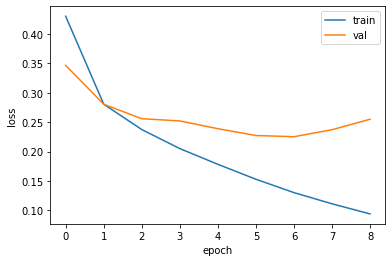

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증 세트에 대한 손실이 점차 감소하다가 정체되기 시작하고 훈련 세트에 대한 손실은 점점 더 낮아지고 있다. 이 그래프를 기반으로 아홉 번째 에포크를 최적으로 생각할 수 있다.

EarlyStopping 클래스에서 restore_best_weight 매개변수를 True로 지정했으므로 현재 model 객체가 최적의 모델 파라미터로 복원 되었다. 즉 ModelCheckpoint 콜백이 저장한 best-cnn-model.h5 파일을 다시 읽을 필요가 없다. 이번에는 세트에 대한 성능을 평가해 보자.


In [29]:
model.evaluate(val_scaled, val_target)

12000/12000 [==============================] - 2s 205us/sample - loss: 0.2252 - acc: 0.9225


[0.22523417075971763, 0.9225]

이 결과는 fit() 메서드의 출력 중 아홉 번째 에포크의 출력과 동일하다. EarlyStopping 콜백이 model 객체를 최상의 모델 파라미터로 잘 복원한 것 같다.

7장에서 잠깐 소개했던 predict() 메서드를 사용해 훈련된 모델을 사용하여 새로운 데이터에 대해 예측을 만들어 보자. 여기에서는 편의상  검증 세트의 첫 번째 샘플을 처음 본 이미지라고 가정한다. 맷플롯립에서는 흑백 이미지에 깊이 차원은 없다. 따라서 (28,28,1) 크기를 (28,28)로 바꾸어 출력해야 한다. 첫 번째 샘플 이미지를 먼저 확인해 보자.

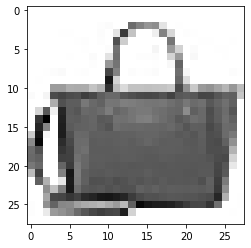

In [31]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

핸드백 이미지이다. 모델은 이 이미지에 대해 어떤 예측을 만드는지 확인해 보자. predict()메서드는 10개의 클래스에 대한 예측 확률을 출력한다.

In [32]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[6.71179421e-14 1.71753347e-16 1.06245229e-18 5.20837849e-15
  1.28537313e-15 5.20008265e-14 1.19354295e-14 9.13565522e-15
  1.00000000e+00 6.55183712e-15]]


- 왜 슬라이싱을 사용했나?
    - val_scaled[0]으로 쓰지 않고 val_scaled[0:1]로 슬라이싱을 사용했다. 케라스의 fit(), predict(), evaluate()메서드는 모두 입력의 첫 번째 차원이 배치 차원일 것으로 기대한다. 따라서 샘플 하나를 전달할 때 (28,28,1)이 아니라 (1,28,28,1) 크기를 전달해야 한다. 배열 슬라이싱은 인덱싱과 다르게 선택된 원소가 하나이더라도 전체 차원이 유지되어 (1,28,28,1)크기를 만든다.
    
출력 결과를 보면 아홉 번째 값이 1이고 다른 값은 거의 0에 가깝다. 다시 말해 아홉 번째 클래스라고 강하게 주장하는 것이다. 이를 막대그래프로 그리면 확실하게 느낄 수 있다.

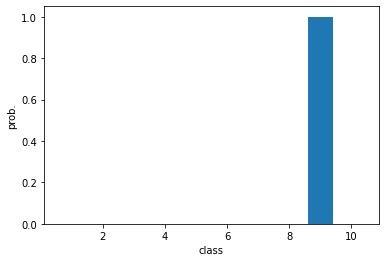

In [33]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

다른 클래스의 값은 사실상 모두 0이다. 아홉 번째 클래스가 실제로 무엇인지는 패션 MNIST 데이터셋의 정의를 참고해야한다. 7장에서 패션 MNIST 데이터셋의 정의를 참고해야 한다. 7장에서 패션 MNIST 데이터셋의 레이블을 보았다. 여기에서는 파이썬에서 레이블을 다루기 위해 리스트로 저장하겠다. 

In [34]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '센탈', '셔츠', '스니커즈', '가방', '앵클 부츠']

클래스 리스트가 있으면 레이블을 출력하기 쉽다. preds 배열에서 가장 큰 인덱스를 찾아 classes 리스트의 인덱스로 사용하면 된다.

In [35]:
import numpy as np
print(classes[np.argmax(preds)])

가방


이 샘플을 '가방'으로 잘 예측한것 같다. 합성곱 신경망을 만들고 훈련하여 새로운 샘플에 대해 예측을 수행하는 방법도 알아보았다. 마지막으로 맨 처음에 떼어 놓았던 테스트 세트로 합성곱 신경망의 일반화 성능을 가늠해 보자. 즉 이 모델을 실전에 투입했을 때 얻을 수 있는 예상 성능을 측정해 보자.

훈련 세트와 검증 세트에서 했던 것처럼 픽셀값의 범위를 0 ~ 1 사이로 바꾸고 이미지 크기를 (28,28)에서 (28,28,1)로 바꾸겠다.

In [36]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

그 다음 evaluate() 메서드로 테스트 세트에 대한 성능을 측정한다.

In [37]:
model.evaluate(test_scaled, test_target)

10000/10000 [==============================] - 2s 199us/sample - loss: 0.2538 - acc: 0.9169


[0.2538219784349203, 0.9169]

역시 예상대로 테스트 세트에서의 점수는 검증 세트보다 조금 더 작다. 이 모델을 실전에 투입하여 패션 아이템을 분류 한다면 91%의 성능을 기대할 수 있다.

### 케라스 API로 합성곱 신경망 구현 - 문제해결 과정

이전 절에서 살펴본 합성곱 신경망의 주요 개념을 토대로 이번 절에서는 케라스 API를 사용해 합성곱 신경망을 만들어 보았다. 케라스의 Conv2D 클래스를 사용해 32개의 필터와 64개의 필터를 둔 2개의 합성곱 층을 추가했다. 두 합성곱 층 다음에는 모두 (2,2) 크기의 최대 풀링 층을 배치했다. 두 번째 풀링 층을 통과한 특성 맵을 펼친 다음 미립 은닉층에 연결하고 최종적으로 10개의 뉴런을 가진 출력층에서 샘플에 대한 확률을 출력했다.

7장에서 사용했던 조기 종료 기법을 사용해 모델을 훈련한 다음 검증 세트로 최적의 에포크에서 성능을 평가했다. 또 샘플 데이터 하나를 선택해 예측 클래스를 출력하는 방법을 살펴보았다.

마지막으로 이제까지 사용하지 않았던 테스트 세트를 사용해 최종 모델의 일반화 성능을 평가했다. 항상 테스트 세트는 모델을 출시하기 직전 딱 한번만 사용해야한다. 그렇지 않다면 모델을 실전에 투입했을 때 성능을 올바르게 예측하지 못한다.

합성곱 신경망은 이미지를 주로 다루기 때문에 각 층의 출력을 시각화 하기 좋다. 다음 절에서는 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 학습한 내용을 고찰해 보겠다.

## 08-3 합성곱 신경망의 시각화

- 핵심키워드
    - 가중치 시각화
    - 특성 맵 시각화
    - 함수형 API
    - 합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해해 보자.
    
    
### 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다. 일반적으로 절편은 시각적으로 의미가 있지 않다. 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.

예를 들어 다음과 같은 가중치는 둥근 모서리가 있는 영역에서 크게 활성화 되고 그렇지 않은 영역에서는 낮은 값을 만들 것이다. 이필터의 가운데 곡선 부분의 가중치 값은 높고 그 외 부분이 가중치 값은 낮을 것이다. 이렇게야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만들기 때문이다.

그럼 2절에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 체크포인트 파일을 읽어 들이겠다.

In [39]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2021-06-01 09:56:40--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 15.164.81.167
Connecting to github.com (github.com)|15.164.81.167|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2021-06-01 09:56:40--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4044200 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  14.6MB/s    in 0.3s    

2021-06-01 09:56:41 (14.6 MB/s) - ‘best-cnn-model.h5.1’ saved [4044200/4044200]



케라스 모델에 추가한 층은 layers 속성에 저장되어 있다. 이 속성은 파이썬 리스트이다. model.layers를 출력해보자.

In [42]:
model.layers

model.layers 리스트에 이전 절에서 추가했던 Conv2D, maxPooling2D 층이 번갈아 2번 연속 등장한다. 그다음 Flatten 층과 Dense 층, Dropout 층이 차례대로 등장한다. 마지막에 Dense 출력층이 놓여 있다.

그럼 첫 번째 합성곱 층의 가중치를 조사해 보겠다. 층의 가중치와 절편은 층의 weights 속성에 저장 되어있다. weights도 파이썬 리스트이다. 다음 코드에서처럼 layers 속성의 첫 번째 원소를 선택해 weight의 첫 번째 원소 (가중치)와 두 번째 원소(절편)의 크기를 출력해 보자

In [45]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


이전 절에서 커널 크기를 (3,3)으로 지정했었다. 이 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3,3,1)이다. 또 필터 개수가 32개이므로 weights의 첫 번째 원소인 가중치의 크기는 (3,3,1,32)가 되었다. weights의 두 번째 원소는 절편의 개수를 나타낸다. 필터마다 1개의 절편이 있으므로 (32,)크기가 된다.

weights 속성은 텐서플로의 다차원 배열인 Tensor 클라스의 객체이다. 여기서는 다루기 쉽도록 numpy()메서드를 사용해 넘파이 배열로 변환하겠다. 그 다음 가중치 배열의 평균과 표준편차를 넘파이 mean()메서드와 std()메서드로 계산해 본다.

이번에는 훈련하지 않은 빈 합성공 신경망을 만들어 보자. 이 합성곱 층의 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교해 보자. 먼저 Sequential 클래스로 모델을 만들고 Conv2D층을 하나 추가한다.

In [50]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

그다음 이 모델의 첫 번째 층(즉 Conv2D 층)의 가중치를 no_training_conv 변수에 저장한다.

In [51]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


이 가중치의 크기도 앞서 그래프로 출력한 가중치와 같다. 동일하게 (3,3)커널을 가진 필터를 32개 사용했기 때문이다. 이 가중치의 평균과 표준편차를 확인해 보자. 이전처럼 먼저 넘파이 배열로 만든 다음 mean(),std()메서드를 호출한다.

### 함수형 API

지금까지는 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했다. 이 클래스는 층을 차례대로 쌓은 모델을 만든다. 딥러닝에서는 좀더 복잡한 모델이 많이있다. 예를들어 입력이 2개일 수도 있고 출력이 2개 일 수도 있다. 이런 경우는 **함수형 API function API**를 사용한다.

함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만든다. 먼저 2개의 Dense 층 객체를 만든다.

In [54]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

model 객체의 입력은 model.input으로 이 모델의 입력을 간단히 얻을 수 있다.

In [58]:
print(model.input)

Tensor("conv2d_3_input:0", shape=(?, 28, 28, 1), dtype=float32)


이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.

In [59]:
conv_acti = keras.Model(model.input, model.layers[0].output)

model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환한다. 하지만 conv_acti의 predict()메서드를 호출하면 첫 번째 Conv2D의 출력을 반환할 것이다. 이제 준비를 마쳤으니 특성 맵을 시각화 해보자.

### 특성 맵 시각화

케라스로 패션 MNIST 데이터셋을 읽은 후 훈련세트에 있는 첫 번째 샘플을 그려 보겠다.

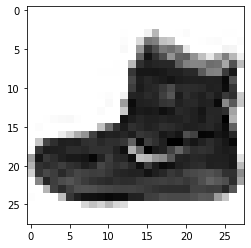

In [60]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

앵클 부츠다. 이 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해 보자. 앞에서도 설명했지만 predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대한다. 하나의 샘플을 전달하더라고 꼭 첫 번째 차원을 유지해야 한다. 이를 위해 슬라이싱 연산자를 사용해 첫 번째 샘플을 선택한다. 그다음에 (784,)크기를 (28,28,1)크기로 변경하고 255로 나눈다.

In [61]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv_acti.predict(inputs)

conv_acti.predict()메서드로 출력한 feature_maps의 크기를 확인해 보자.

In [62]:
print(feature_maps.shape)

(1, 28, 28, 32)


세임 패딩과 32개의 필터를 사용한 합성곱 층의 출력이므로 (28,28,32)이다. 첫 번째 차원은 배치 차원이라는 점을 기억하자. 샘플을 하나 입력했디 때문에 1이 된다.

이제 앞에서와 같이 맷플롯립의 imshow 함수로 이 특성 맵을 그려 보겠다. 총 32개의 특성 맵이 있으므로 4개의 행으로 나누어 그려보겠다.

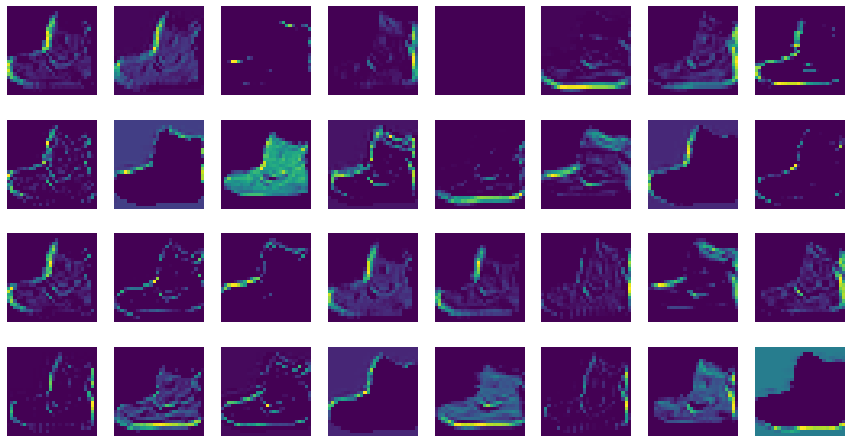

In [63]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')
        
plt.show()

이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여준다. 앞서 32개 필터의 가중치를 출력한 그림과 몇개를 비교해 보겠다.

다음 그림에서 첫 번째 필터는 오른쪽에 있는 수직선을 감지한다. 첫 번째 특성 맵은 이 필터가 감지한 수직선이 강하게 활성화되었다. 세 번째 필터는 전체적으로 밝은색이므로 전면이 모두 칠해진 영역을 감지한다. 세 번째 특성 맵에서 이를 잘 확인할 수 있다. 흑백 부츠 이미지에서 검은 영역이 모두 잘 활성화 되어 있다.

이와 반대로 마지막 필터는 전체적으로 낮은 음수 값이다. 이 필터와 큰 양수가 곱해지면 더 큰 음수가 되고 배경처럼 0에 가까운 값과 곱해지면 작은 으무가 될 것이다. 즉 부츠의 배경이 상대적으로 크게 활성화 될 수 있다. 이 결과를 마지막 특성 맵에서 잘 볼 수 있다.

두 번째 합성곱 층이 만든 특성 맵도 같은 방식으로 확인할 수 있다. 먼저 model 객체의 입력과 두 번째 합성곱 층인 model.layers[2]의 출력을 연결한 conv2_acti 모델을 만든다.

In [64]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

그 다음 첫 번째 샘플을 conv2_acti 모델의 predict() 메서드에 전달한다.

In [65]:
inputs= train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

첫 번째 풀링 층에서 가로세로 크기가 절반으로 줄었고, 두 번째 합성곱 층의 필터 개수는 64개이므로 feature_maps의 크기는 배치 차원을 제외하면 (14,14,64)일 것이다. 한번 확인해 보자.

In [66]:
print(feature_maps.shape)

(1, 14, 14, 64)


예상대로다. 그럼 64개의 특성 맵을 8개씩 나누어 imshow()함수로 그려 보겠다.

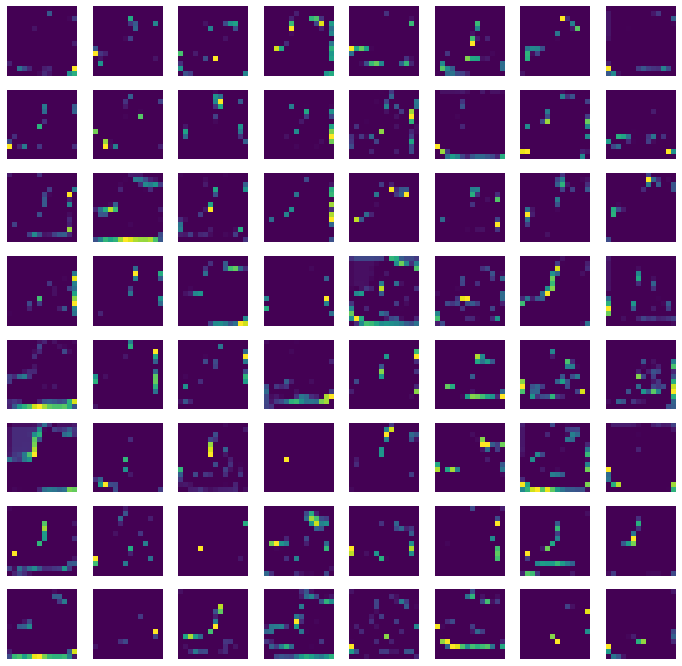

In [67]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')
plt.show()

이 특성 맵은 시각적으로 이해하기 쉽다. 두 번째 합송급 층의 필터 크기는 (3,3,32)이다. 두 번째 합성곱 층의 첫 번째 필터가 앞서 출력한 32개의 특성 맵과 곱해져 두 번째 합성곱 층의 첫 번째 특성 맵이 된다. 다음의 그림처럼 이렇게 계산된 출력은 (14,14,32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기가 어렵다.

이런 현상은 합성곱 층을 많이 쌓을수록 심해진다. 이를 바꾸어 생각하면 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다. 합성곱 신경망이 패션 MNIST 이미지를 인식하여 10개의 클래스를 찾아낼 수 있는 이유가 바로 여기에 있다.

### 시각화로 이해하는 합성곱 신경망 - 문제해결 과정

2절을 훈련하여 저장한 합성곱 신경망 모델을 읽어 들인 후 이 모델의 가중치와 특성 맵을 시각화해보았다. 이를 통해 합성곱 층이 어떻게 입력에서 특성을 학습하는지 관잘할 수 있다.

입력에 가까운 합성곱 층은 이미지에서 시각적인 정보다 패턴을 감지하도록 훈련한다. 이어지는 합성곱 층은 이런 시각적인 정보를 활용해 조금 더 고차원적인 개념을 학습한다. 층이 추가될수록 이런 현상은 더욱 강해진다. 결국 주어진 이미지가 패션 MNIST 데이터셋에 있는 10개의 클래스 중 어떤 것인지를 판단할 수 있다.

특성 맵을 시각화하면서 케라스 API의 핵심 기능 중 하나인 함수형 API를 배웠다. 함수형 API를 사용하면 복잡한 조합의 모델을 자유롭게 구성할 수있다. 이 절에서는 입력과 합성곱 층의 출력은 연결하여 특성 맵을 시각화하기 위한 용도로 사용했다.

- 출처: 혼자 공부하는 머신러닝 + 딥러닝